In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
from symlinkold.imports import *
from symlinkold.structured import *

D:\PythonRIDE\envs\fastai\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df_raw = pd.read_csv('income_evaluation.csv')
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Preprocessing

In [5]:
df_raw.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
X = df_raw.drop([' income'], axis=1)
y = df_raw[' income']

In [7]:
X.drop(' education', axis=1, inplace=True)

In [8]:
X_cat = X[[' workclass', ' marital-status', ' occupation', ' relationship', ' race', ' sex', 
                      ' native-country']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [9]:
X_cat.shape

(32561, 79)

In [10]:
X = pd.concat([X, X_cat], axis=1)
X.drop([' workclass', ' marital-status', ' occupation', ' relationship', ' race', ' sex', 
                      ' native-country'], axis=1, inplace=True)

## Training, Test & Validation split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(20838, 85)

In [14]:
X_test.shape

(6513, 85)

In [15]:
q = df_raw[' education'].unique()
q

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc',
       ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
      dtype=object)

In [16]:
idx1 = [14, 13, 11, 8, 4, 12, 2, 15, 1, 5, 7, 6, 0, 3, 10 , 9]
q = q[idx1]
q

array([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad',
       ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'],
      dtype=object)

In [17]:
q = pd.Series(q)
q.index = np.arange(1, 17)
q

1         Preschool
2           1st-4th
3           5th-6th
4           7th-8th
5               9th
6              10th
7              11th
8              12th
9           HS-grad
10     Some-college
11        Assoc-voc
12       Assoc-acdm
13        Bachelors
14          Masters
15      Prof-school
16        Doctorate
dtype: object

# Random Forest

## Single Tree

In [18]:
m = RandomForestClassifier(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8234475477493042

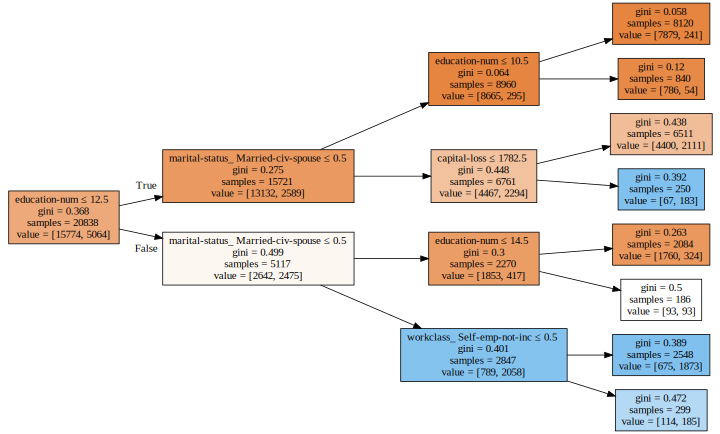

In [19]:
draw_tree(m.estimators_[0], X_train, precision=3)

## Testing on Validation Set

In [30]:
set_rf_samples(2000)
m = RandomForestClassifier(n_estimators=40, max_features=0.5, min_samples_leaf=10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8928400038391401

In [31]:
m.oob_score_

0.8612630770707361

In [32]:
predict_val = m.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predict_val)

0.8556621880998081